# Logistic Regression for malignancy prediction in cancer

Tutorial followed - https://towardsdatascience.com/logistic-regression-for-malignancy-prediction-in-cancer-27b1a1960184

Linear regression is used for continuous-valued outputs whilst logistic regression is used for predicting discrete-valued outputs like 'yes' or 'no' to hospital readmission. Both techniques are supervised.


The breast cancer dataset used in this tutorial is found here - https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Cells from a biopsy were scanned and 30 features of cell nuclei were elucidated.These 30 features of the dataset will be what the logistic regression predictor is based on - predicting whether a new patient has a probability of developing malignancy or not.

In [1]:
import os
os.getcwd()

'C:\\Users\\georg\\Regression Technique Tutorials'

## 1 - Import packages from SciPy

Importing relevant analysis packages and *seaborn* a data visualisation library based on matplotlib. 

In [2]:
# All pacakges are part of SciPy.org
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.optimize as op 
import seaborn as sns
from __future__ import division

## 2 - Upload Data

In [3]:
# Read data from file 'wsbc.data.csv' 
# and create a pandas DF containing the data.

df = pd.read_csv("wdbc.data.csv")
df.head()

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_dimension,...,W_Texture,W_Perimeter,W_Area,W_Smoothness,W_Compactness,W_Concavity,W_Concave_points,W_Symmetry,W_fractal_dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [4]:
df1 = df[["Radius","Texture","Perimeter","Area","Smoothness","Compactness","Diagnosis"]]
df1.head()

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,1


## 3 - Data Visualisation and Bivariate Analysis

We need to know ID which of the 30 features are the most important for the prediction model. Selecting features of a dataset is important when using ML techniques to ensure a useful classification and avoiding predictive bias - "garbage in, garbage out!". 

### Visualisation Per Pair

In the following chunk of code, the df made earlier is used as an arguement for the *sns pairplot* method. *Pairplot* uses the 'palette' argument to colour points either blue(benign/0) or red(malignant/1) depending on diagnosis value. 

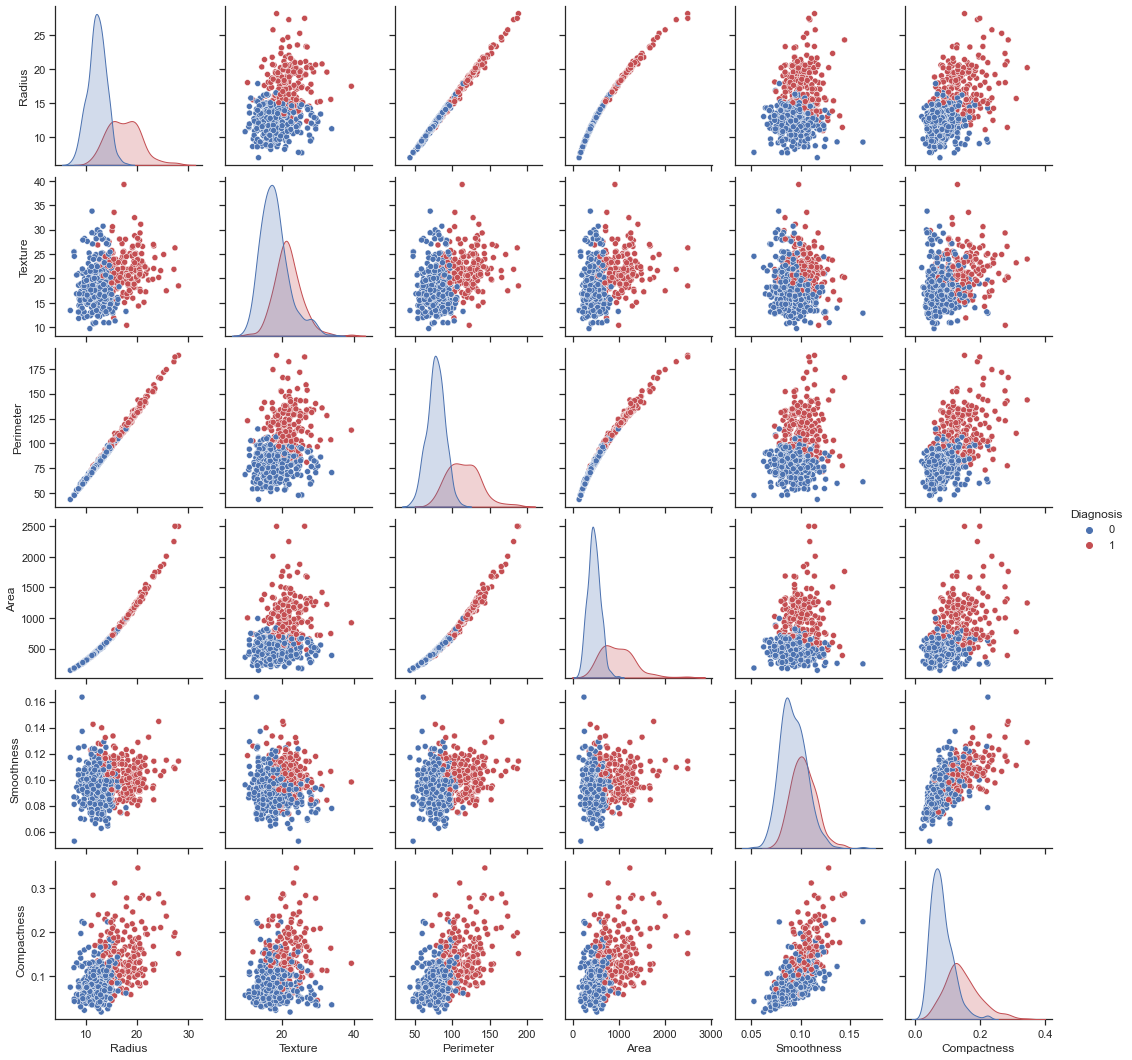

In [5]:
# sns is a seaborn object

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df1, palette = ('b', 'r'), hue="Diagnosis", height=2.5)
plt.show()

Each row above represents pairwise scatter plots of different parameters. Some pairs have the 'correct' amount of seperation concerning diagnosis, such as *Radius vs Texture* or *Perimeter vs Smoothness*. 

### Bivariate Analysis

A more efficient method than visualisation, for selecting non-redundant features is **Bivariate Analysis**. It is a method based on correlation, analysing the relationship between pairs of elements. The function in the code below,*features_correlation_matrix*,takes the cancer df as an argument and returns a correlation matrix for the 30 features.

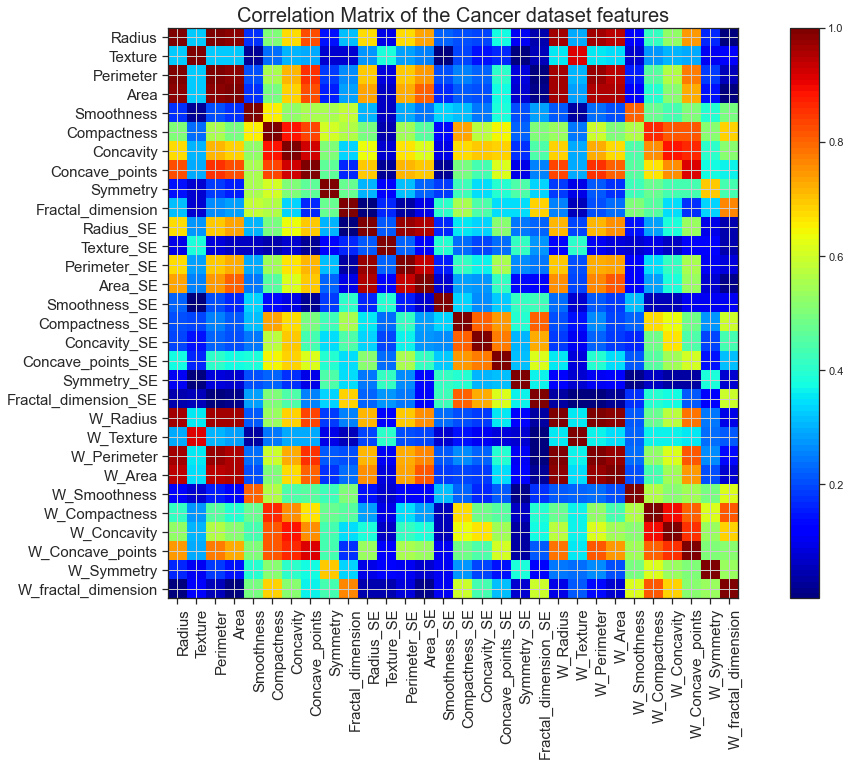

In [6]:
#Bivariate analysis, making a features correlation matrix 
#from the cancer df

def features_correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax1 = fig.add_subplot(111)
    
    cmap = cm.get_cmap('jet', 100)
    
    cax = ax1.imshow(df.corr().abs(), interpolation="nearest", \
                     cmap=cmap)
    ax1.grid(True)
    plt.title('Correlation Matrix of the Cancer dataset features',fontsize=20)
    labels=list(df.columns)
    
    ax1.set_xticks(np.arange(len(labels)))
    ax1.set_yticks(np.arange(len(labels)))
    
    ax1.set_xticklabels(labels,fontsize=15,\
              horizontalalignment="left", rotation='vertical')
    
    ax1.set_yticklabels(labels,fontsize=15)

    # Add a colourbar
    
    fig.colorbar(cax, ticks=[-1.0, -0.8, -0.6, -0.4, -0.2, 0, \
                             0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

# Drop the diagnosis column from df and copy it into df_features
df_features = df.drop(df.columns[-1],axis=1)
# Run the correlation_matrix function, using df_features as argument
features_correlation_matrix(df_features)

In the correlation matrix above, we can see that some variables are notably correlated with values > 0.9. The assumption of *bivariate analysis* is that features that are highly associated provide redundant information.These features should therefore be eliminated to avoid *predictive bias*.

Prediction bias measures how far apart one's "average of predictions" is from "average of observations". A significant nonzero prediction bias indicates an unsound model that's overestimating the amount of positive labels, e.g. a model going against the standard average of 1% of all emails being spam but instead having an average prediction of 20% of emails being spam.

Possible causes of prediction bias include: incomplete feature set; noisy dataset; biased training sample.

The following code drops highly-correlated features - 

In [7]:
# Dropping of features with a correlation > 0.9
# Create the correlation matrix with absolute values
corr_matrix = df_features.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [8]:
#to_drop contains 10 redundant features
to_drop

['Perimeter',
 'Area',
 'Concave_points',
 'Perimeter_SE',
 'Area_SE',
 'W_Radius',
 'W_Texture',
 'W_Perimeter',
 'W_Area',
 'W_Concave_points']

Make a new df with remaining 20 features - 

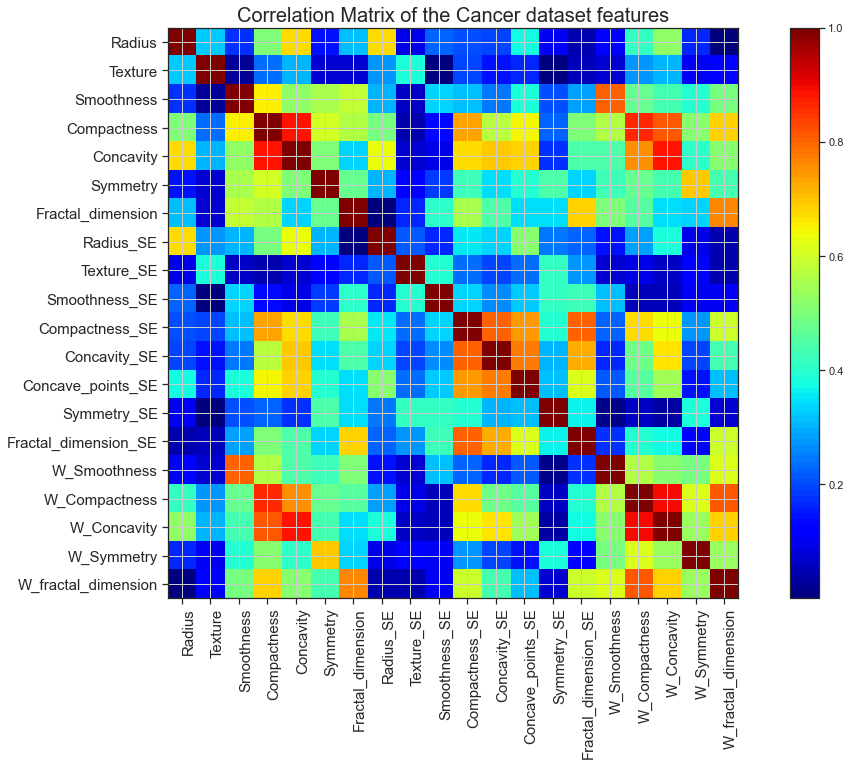

In [9]:
# Drop the redundant features from the df
df_features_corr_dropped = df_features.drop(df_features[to_drop], axis=1)

# Re-plot the dropped df containing only not-redundant features
# using the feature_correlation_matrix() function
features_correlation_matrix(df_features_corr_dropped)

The correlation matrix values can be directly accessed - 

In [10]:
# Print a table with all the features correlations
# Redundant features were dropped from the original 30 features dataset
# To get the correlation, we apply the .corr() method
# followed by the .abs() method to the df_features_corr_dropped DataFrame
df_features_corr_dropped.corr().abs()

,Radius,Texture,Smoothness,Compactness,Concavity,Symmetry,Fractal_dimension,Radius_SE,Texture_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_points_SE,Symmetry_SE,Fractal_dimension_SE,W_Smoothness,W_Compactness,W_Concavity,W_Symmetry,W_fractal_dimension
Radius,1.000000,0.323782,0.170581,0.506124,0.676764,0.147741,0.311631,0.679090,0.097317,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.119616,0.413463,0.526911,0.163953,0.007066
Texture,0.323782,1.000000,0.023389,0.236702,0.302418,0.071401,0.076437,0.275869,0.386358,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.077503,0.277830,0.301025,0.105008,0.119205
Smoothness,0.170581,0.023389,1.000000,0.659123,0.521984,0.557775,0.584792,0.301467,0.068406,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.805324,0.472468,0.434926,0.394309,0.499316
Compactness,0.506124,0.236702,0.659123,1.000000,0.883121,0.602641,0.565369,0.497473,0.046205,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.565541,0.865809,0.816275,0.510223,0.687382
Concavity,0.676764,0.302418,0.521984,0.883121,1.000000,0.500667,0.336783,0.631925,0.076218,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.448822,0.754968,0.884103,0.409464,0.514930
Symmetry,0.147741,0.071401,0.557775,0.602641,0.500667,1.000000,0.479921,0.303379,0.128053,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.426675,0.473200,0.433721,0.699826,0.438413
Fractal_dimension,0.311631,0.076437,0.584792,0.565369,0.336783,0.479921,1.000000,0.000111,0.164174,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,0.504942,0.458798,0.346234,0.334019,0.767297
Radius_SE,0.679090,0.275869,0.301467,0.497473,0.631925,0.303379,0.000111,1.000000,0.213247,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754,0.141919,0.287103,0.380585,0.094543,0.049559
Texture_SE,0.097317,0.386358,0.068406,0.046205,0.076218,0.128053,0.164174,0.213247,1.000000,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723,0.073658,0.092439,0.068956,0.128215,0.045655
Smoothness_SE,0.222600,0.006614,0.332375,0.135299,0.098564,0.187321,0.401964,0.164514,0.397243,1.000000,0.336696,0.268685,0.328429,0.413506,0.427374,0.314457,0.055558,0.058298,0.107342,0.101480


## 4 - Logistic Regression Hypothesis Model

The *sigmoid (log) function* is non-linear and calculates the probability that the diagnosis output is benign/0 or malignant/1. 

In [11]:
def sigmoid(z):
    return 1/ (1+np.exp(-z))

## 5 - Cost Function

To select parameters (theta) we calculate their cost function, then optimising the search with algorithms for gradient descent optimisation. 

In [12]:
def calcCostFunction(theta, X, y):
    
    #no. training examples
    m,n = X.shape
    
    #Calculating vectorised sigmoid function
    h = X.dot(theta)
    
    #Calculate the cost function J
    J = -(np.sum(y * np.log(sigmoid(h)) + (1 - y) * np.log(1-sigmoid(h)))/m)
    return J

## 6 - Gradient Function Optimisation

*Gradient Descent* is an algorithm that calculates the derivative of the cost function, updating the vector theta by means of the parameter *a*, *a* being the learning rate. Gradient descent isn't the only algorithm for minimising the cost function.

More sophisticated algorithm for mimising cost function include: ***Conjugate Gradient***; ***BFGS***; ***L_BGFS*** ; ***TNC***. These algorithms try to optimise the *Gradient Function* which is the difference between actual vector y of the dataset and the 
*h vector* (*prediction*), to learn how to find the minimum *J*.

The optimisation algorithm will repeat until convergence to the global minimum *J*. Also, parameters *theta* will always be updated simultaneously.The code for calculing the algorithm -

In [13]:
#Gradient function#
def calcGradient(theta, X, y):
    
    #no. training samples
    m,n= X.shape
    
    #Calculate h
    h  = X.dot(theta)
    
    #Calculate error
    error = sigmoid(h) - y
    
    #Calculate new theta
    gradient = 1/m * (X.T).dot(error)
    
    return gradient

Part 9 demonstrates how to optimise the gradient function, using one of the algorithms from *scipy.otimize*.

## 7 - Feature Scaling and Normalisation

The **numpy.zeros()** function returns a new array of given shape and type, with zero. The **numpy.vstack()** function is used to stack the sequence of input arrays vertically to make a single array.

In [14]:
#Scaling and normalising the features for our two variables

def FeatureScalingNorm(X):
    # Initialize the following variables:
    # Make a copy of the X vector and call it X_norm
    X_norm = X 

    # Initialize mu: It will contain the average 
    # value of X in training set.
    mu = np.zeros(X.shape[1]) 
    
    # Initialize sigma: It will contain the Range(max-min)
    # of X or Standard Deviation
    sigma = np.zeros(X.shape[1]) 

    # mu (mean)
    mu = np.vstack((X[0].mean(),
                    X[1].mean()))

    # The Standard Deviation calculation with NumPy,
    # requires the argument "degrees of freedom" = 1
    sigma = np.vstack((X[0].std(ddof=1),\
                       X[1].std(ddof=1)))     

    # Number of training examples
    m = X.shape[1] 
    
    # Make a vector of size m with the mu values
    mu_matrix = np.multiply(np.ones(m), mu).T 
    
    # Make a vector of size m with the sigma values    
    sigma_matrix = np.multiply(np.ones(m), sigma).T
    
    # Apply the Feature Scaling Normalization formula
    X_norm = np.subtract(X, mu).T
    X_norm = X_norm /sigma.T
    
    return [X_norm, mu, sigma]

## 8 - Calculate accuracy

In [15]:
def CalcAccuracy(theta, X):
    p = sigmoid(X.dot(theta)) >= 0.5
    return p

## 9 - Implementing Log Regression with two variables

All the previous steps have created the fundamental functions for log regression-
<ul>
    <li>sigmoid(z)
    <li>calcCostFunction(theta, X, y)
    <li>calcGradient(theta, X, y)
    <li>FeatureScalingNorm(X)
    <li>CalcAccuracy(theta, X)

Now we'll write code that wraps all of these functions, to predict malignant or not based on just 2 of the 20 non-redundant features in the dataset. To choose the features, we can refer to the table in the *bivariate analysis* section.

For example, *smoothness* and *radius* have a correlation score of 0.17. The following code makes the features numpy array *X* and the ouput numpy vector *y* from df - 

Text(0, 0.5, 'Smoothness')

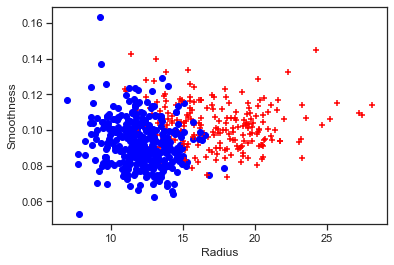

In [16]:
# Make the X and y numpy arrays,
# containing the values of
# Radius and Smoothness
X = np.vstack((np.asarray(df.Radius.values), \
               np.asarray(df.Smoothness.values)))
y = np.asarray(df.Diagnosis.values)

#Plot the data
for i in range(len(y)):
    if y[i]==0.0:
        c = 'blue'
        m = u'o'
    if y[i]==1.0:
        c = 'red'
        m = u'+'
    plt.scatter(X[0][i], X[1][i], color=c, marker=m)

# Put labels
plt.xlabel(df.columns[df.columns.get_loc("Radius")])
plt.ylabel(df.columns[df.columns.get_loc("Smoothness")])

The blue dots represent the benigns, the red crosses represent the malignants. Now the data should be normalised and scaled. 

In [17]:
# Normalise X using the FeatureScalingNorm function, and 
# copy the results into a  "featuresNormalizeresults" list
featuresNormalizeresults = FeatureScalingNorm(X)

#get the normalised X matrix
X = np.asarray(featuresNormalizeresults[0]).T

#get the mean
mu = featuresNormalizeresults[1]

#get the sigma
sigma = featuresNormalizeresults[2]

#Update array X by adding a column of "ones", with .vstack

#no.training examples
m = len(y)

#no.features
n=len(X)

#Add a column of ones to X matrix
X = np.vstack((np.ones(m), X)).T

### Testing

Let's test our cost function and gradient functions, just with theta at 0,0,0 -  

In [18]:
# Compute cost and gradient, 
# and display the updated theta starting with initial theta = [0, 0, 0]

initial_theta = np.zeros(n+1); # set theta = [0, 0, 0]

print ("J", calcCostFunction(theta=initial_theta, X=X, y=y))
print ("grad", calcGradient(theta=initial_theta, X=X, y=y))

J 0.6931471805599453
grad [ 0.12741652 -0.35265304 -0.17320866]


In [19]:
#Compute cost and gradient, 
#and display the updated theta starting with a non-zero theta

test_theta = [-60, 6, 0.7];

print ("J", calcCostFunction(theta=test_theta, X=X, y=y))
print ("grad", calcGradient(theta=test_theta, X=X, y=y))

J 20.11784450093274
grad [-0.37258348 -0.35265304 -0.17320866]


### Gradient Descent Advanced Optimisation  

The next chunk of code finds theta using ***BFGS***, a method internally called by the function *Scypy minimise* - 

In [20]:
# Gradient Descent Advanced Optimization: BFGS
# Update and find the optimal theta
m , n = X.shape;
initial_theta = np.zeros(n);
Result = op.minimize(fun = calcCostFunction, 
                                 x0 = initial_theta, 
                                 args = (X, y),
                                 method = 'BFGS',
                                 jac = calcGradient);
theta = Result.x;
Result

      fun: 0.22047613856059117
 hess_inv: array([[14.96804057, -2.95242022, -5.20043457],
       [-2.95242022, 93.93988913, 21.51355566],
       [-5.20043457, 21.51355566, 19.03316766]])
      jac: array([-6.50651120e-06,  1.32854522e-06, -7.21307516e-06])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 19
     njev: 20
   status: 0
  success: True
        x: array([-0.79255475,  4.27707742,  1.43938055])

### Decision Boundary

In log regression, the hypothesis *htheta(x)* calculates the probability the output is 0 or 1. To map this probability to a discrete class, we select a threshold (0.5). Above the threshold values will be classified as 1/malignant or 0/benign. 

A decision boundary is a property of the hypothesis and the parameters theta, not a property of the dataset. Let's plot radius and smoothness features again, adding a black line to represent the decision boundary for the found theta:

Text(0, 0.5, 'Smoothness')

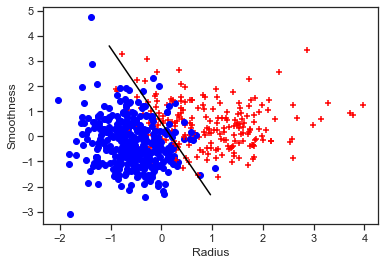

In [21]:
#Creating a plot set
plot_x = np.asarray([X.T[1].min()+1, X.T[1].max()-3])

#Calculating the decision boundary
plot_y = (-1/theta[2]) * (theta[1] * plot_x + theta[0])

#Plot the data
for i in range(len(y)):
    if y[i]==0.0:
        c = 'blue'
        m = u'o'
    if y[i]==1.0:
        c = 'red'
        m = u'+'
    plt.scatter(X.T[1][i], X.T[2][i], color=c, marker=m)

#Decision boundary
plt.plot(plot_x, plot_y, color='black')


# Put labels
plt.xlabel(df.columns[df.columns.get_loc("Radius")])
plt.ylabel(df.columns[df.columns.get_loc("Smoothness")])

### Calculate Accuracy

Calculate the accuracy of the algorithm -


In [22]:
p = CalcAccuracy(theta, X)
p = (p == y) * 100
print ("Train Accuracy:", p.mean())

Train Accuracy: 90.86115992970123


### Making a Prediction


Predictions can be made with the algorithm, e.g. what's the outcome for *Radius* = 30 and *Smoothness* = 3.6 - 

In [23]:
# Predict the risk of malignancy for Radius = 30 and Smoothness = 3.6

query = np.asarray([1,30,3.6])

#scale & normalised query
query_norm = \
np.asarray([1, ((query[1]-float(mu[0]))/float(sigma[0])),\
            ((query[2]-float(mu[1]))/float(sigma[1]))])

prediction = sigmoid(query_norm.dot(theta));
prediction

1.0

A prediction of 1 and therfore malignancy.

## 10 - Malignancy Prediction for Multiple Variables

*np.zeros* returns a new array of given shape and type, filled with zeros. *np.multiply* multiplies arguments element-wise. *np.substract* substract arguments, element-wise.*np.ones* returns a new array of given shape and type, filled with ones.

The following cells contain code that modifies the previously used function so they can handle multiple variables -

In [26]:
def FeatureScalingNormalizationMultipleVariables(X):
    # N.B.: this code is adapted for multiple variables
    
    # Initialize the following variables:
    # Make a copy of the X vector and call it X_norm
    X_norm = X 

    # mu: It will contain the average 
    # value of X in training set.
    mu = np.zeros(X.shape[1]) 
    

    # sigma: It will contain the Range(max-min)
    # of X or Standard Deviation
    sigma = np.zeros(X.shape[1]) 

    mu = np.vstack((X[0].mean(), \
                    X[1].mean(), \
                    X[2].mean()))
    # The Standard Deviation calculation with NumPy,
    # requires the argument "degrees of freedom" = 1
    sigma = np.vstack((X[0].std(ddof=1),\
                       X[1].std(ddof=1),\
                       X[2].std(ddof=1)))     

    # number of training examples
    m = X.shape[1] 
    
    # Make a vector of size m with the mu values
    mu_matrix = np.multiply(np.ones(m), mu).T 
    
    # Make a vector of size m with the sigma values    
    sigma_matrix = np.multiply(np.ones(m), sigma).T
    
    # Apply the Feature Scaling Normalization formula
    X_norm = np.subtract(X, mu).T
    X_norm = X_norm /sigma.T
    
    return [X_norm, mu, sigma]
            

*scipy.optimize.minimize* minimises the scalar function of one or more variables. The code for the whole process of log regression w/multiple variables is given below:

In [33]:
# Make a pandas DataFrame "df" 
# containing the wdbc data.
df = pd.read_csv("wdbc.data.csv") 

# Make the X and y numpy arrays 
# N.B.: update this code for multiple variables
X = np.vstack((np.asarray(df.Radius.values), \
               np.asarray(df.Texture.values),\
               np.asarray(df.W_Concave_points.values)))

y = np.asarray(df.Diagnosis.values)

# Normalize X using the FeatureScalingNormalizationMultipleVariables function, and 
# copy the results in the "featuresNormalizeresults" list
featuresNormalizeresults = FeatureScalingNormalizationMultipleVariables(X)

# get the normalized X matrix
X = np.asarray(featuresNormalizeresults[0]).T

# get the mean
mu = featuresNormalizeresults[1]

# get the sigma
sigma = featuresNormalizeresults[2]

# number of training examples
m = len(y) 

# number of features
n = len(X)

# Add a column of ones to the array/matrix X ad add a column of '1's
X = np.vstack((np.ones(m), X)).T

# Gradient Descent Advanced Optimization: Update and find the optimal theta
m , n = X.shape;
initial_theta = np.zeros(n);
Result = op.minimize(fun = calcCostFunction, 
                                 x0 = initial_theta, 
                                 args = (X, y),
                                 method = 'BFGS',
                                 jac = calcGradient);
theta = Result.x;
message = Result.message



# Perform a Query:
# Predict the risk of malignancy for: 
# Radius = 5.00, Texture = 1.10, and W_Concave_points = 0.4
# N.B.: update this code for multiple variables
query = np.asarray([1, 5.00, 1.10, 0.4])

# Scale and Normalize the query
query_Normalized = np.asarray([1, ((query[1]-float(mu[0]))/float(sigma[0])),\
                               ((query[2]-float(mu[1]))/float(sigma[1])),\
                               ((query[3]-float(mu[2]))/float(sigma[2]))])

# Calculate the prediction using the Logistic Function
prediction = sigmoid(query_Normalized.dot(theta));

# Calculate accuracy
p = CalcAccuracy(theta, X)
p = (p == y) * 100

# Print the output
print (message)
print (theta)
print (p.mean())
print (prediction)

Optimization terminated successfully.
[-1.40776926  3.13487429  1.52552603  4.02250701]
95.43057996485061
0.8154762110038789
